In [1]:
#Getting the files
import os
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

label_names = unpickle('cifar-10-batches-py/batches.meta')[b'label_names']
training_files = ['data_batch_2','data_batch_3','data_batch_4','data_batch_5']

training_dict = unpickle('cifar-10-batches-py/data_batch_1')

training_data = training_dict[b'data']
training_labels = training_dict[b'labels']

for f in training_files:
    training_dict = unpickle('cifar-10-batches-py/'+f)
    training_data = np.concatenate((training_data,training_dict[b'data']),axis=0)
    training_labels += training_dict[b'labels']

test_dict = unpickle('cifar-10-batches-py/test_batch')

test_data = test_dict[b'data']
test_labels = test_dict[b'labels']

def dataToIMG(arr):
    RGBsort = np.stack(np.hsplit(arr,3),2)
    IMGsort = np.swapaxes(np.swapaxes(np.stack(np.split(RGBsort,32,1),3),2,3),1,2)
    return IMGsort

b'batch_label' 
   &emsp;Ignore since we don't use their batches

b'labels'
    &emsp;Our output data

b'data'
    &emsp;Our input data, values go from 0 to 255

b'filenames'
    &emsp;Ignore since filenames aren't needed

b'ship'


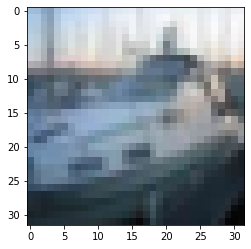

In [11]:
import matplotlib.pyplot as plt

picID = 2

plt.imshow(dataToIMG(test_data)[picID])
print(label_names[test_labels[picID]])

Model 1:

In [6]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same',))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same',))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same',))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same',))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same',))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.summary()

from keras import optimizers

model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.001,momentum=0.9),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [7]:
from keras import utils
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow(
    dataToIMG(training_data), 
    utils.to_categorical(training_labels), 
    batch_size=64,
    subset="training")

validation_generator = datagen.flow(
    dataToIMG(training_data), 
    utils.to_categorical(training_labels), 
    batch_size=64,
    subset="validation")

history = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

np.mean(history.history["acc"])

Epoch 1/10
625/625 [==============================] - 97s 155ms/step - loss: 1.5265 - acc: 0.4568 - val_loss: 1.2447 - val_acc: 0.5565
Epoch 2/10
625/625 [==============================] - 97s 155ms/step - loss: 1.0978 - acc: 0.6082 - val_loss: 1.0658 - val_acc: 0.6235
Epoch 3/10
625/625 [==============================] - 97s 156ms/step - loss: 0.9308 - acc: 0.6700 - val_loss: 1.0695 - val_acc: 0.6235
Epoch 4/10
625/625 [==============================] - 94s 151ms/step - loss: 0.8112 - acc: 0.7117 - val_loss: 0.9500 - val_acc: 0.6666
Epoch 5/10
625/625 [==============================] - 94s 151ms/step - loss: 0.7200 - acc: 0.7485 - val_loss: 0.9274 - val_acc: 0.6788
Epoch 6/10
625/625 [==============================] - 93s 149ms/step - loss: 0.6406 - acc: 0.7767 - val_loss: 0.8831 - val_acc: 0.6977
Epoch 7/10
625/625 [==============================] - 90s 145ms/step - loss: 0.5716 - acc: 0.8002 - val_loss: 0.8874 - val_acc: 0.6995
Epoch 8/10
625/625 [==============================] - 9

0.7309174984693527

In [19]:
img_test_data = dataToIMG(test_data)
img_test_labels = utils.to_categorical(test_labels)

model1.evaluate(
    x=img_test_data,
    y=img_test_labels)[1]

model1.save('model1.h5')

313/313 [==============================] - 3s 9ms/step - loss: 0.9397 - acc: 0.6965


Model 2

In [1]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same',))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2)) 

model2.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same',))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same',))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2)) 

model2.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same',))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same',))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten())
model2.add(layers.Dense(1024, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(0.001,0.91,0.01,1e-07,False),
              metrics=['acc'])

NameError: name 'models' is not defined

In [9]:
from keras import utils
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow(
    dataToIMG(training_data), 
    utils.to_categorical(training_labels), 
    batch_size=64,
    subset="training")

validation_generator = datagen.flow(
    dataToIMG(training_data), 
    utils.to_categorical(training_labels), 
    batch_size=64,
    subset="validation")

history = model2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

np.mean(history.history["acc"])

Epoch 1/10
625/625 [==============================] - 89s 142ms/step - loss: 1.5413 - acc: 0.4865 - val_loss: 1.0763 - val_acc: 0.6143
Epoch 2/10
625/625 [==============================] - 88s 141ms/step - loss: 0.9829 - acc: 0.6566 - val_loss: 0.8976 - val_acc: 0.6891
Epoch 3/10
625/625 [==============================] - 88s 141ms/step - loss: 0.8366 - acc: 0.7117 - val_loss: 0.8960 - val_acc: 0.6905
Epoch 4/10
625/625 [==============================] - 86s 137ms/step - loss: 0.7527 - acc: 0.7413 - val_loss: 0.8488 - val_acc: 0.7205
Epoch 5/10
625/625 [==============================] - 87s 139ms/step - loss: 0.6833 - acc: 0.7656 - val_loss: 0.7234 - val_acc: 0.7524
Epoch 6/10
625/625 [==============================] - 88s 141ms/step - loss: 0.6323 - acc: 0.7850 - val_loss: 0.8020 - val_acc: 0.7490
Epoch 7/10
625/625 [==============================] - 88s 141ms/step - loss: 0.5807 - acc: 0.8000 - val_loss: 0.7477 - val_acc: 0.7570
Epoch 8/10
625/625 [==============================] - 8

0.7431174874305725

In [10]:
img_test_data = dataToIMG(test_data)
img_test_labels = utils.to_categorical(test_labels)

model2.evaluate(
    x=img_test_data,
    y=img_test_labels)[1]

model2.save('model2.h5')

313/313 [==============================] - 3s 11ms/step - loss: 0.8208 - acc: 0.7666: 2s - loss: 0.8091 - 


Model 3

In [12]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(256, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(256, (2, 2), activation='relu', padding='same',))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(0.001,0.905,0.991,1e-06,False),
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)       

In [13]:
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow(
    dataToIMG(training_data), 
    utils.to_categorical(training_labels), 
    batch_size=64,
    subset="training")

validation_generator = datagen.flow(
    dataToIMG(training_data), 
    utils.to_categorical(training_labels), 
    batch_size=64,
    subset="validation")

history = model3.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

np.mean(history.history["acc"])

Epoch 1/10
625/625 [==============================] - 93s 148ms/step - loss: 1.6026 - acc: 0.4136 - val_loss: 1.2452 - val_acc: 0.5578
Epoch 2/10
625/625 [==============================] - 94s 150ms/step - loss: 1.1223 - acc: 0.5976 - val_loss: 1.0240 - val_acc: 0.6442
Epoch 3/10
625/625 [==============================] - 93s 149ms/step - loss: 0.9265 - acc: 0.6709 - val_loss: 0.9256 - val_acc: 0.6746
Epoch 4/10
625/625 [==============================] - 91s 146ms/step - loss: 0.8006 - acc: 0.7171 - val_loss: 0.7831 - val_acc: 0.7254
Epoch 5/10
625/625 [==============================] - 91s 145ms/step - loss: 0.7112 - acc: 0.7488 - val_loss: 0.7452 - val_acc: 0.7430
Epoch 6/10
625/625 [==============================] - 90s 144ms/step - loss: 0.6471 - acc: 0.7729 - val_loss: 0.7000 - val_acc: 0.7606
Epoch 7/10
625/625 [==============================] - 90s 144ms/step - loss: 0.5869 - acc: 0.7936 - val_loss: 0.6707 - val_acc: 0.7677
Epoch 8/10
625/625 [==============================] - 8

0.7181524991989136

In [14]:
img_test_data = dataToIMG(test_data)
img_test_labels = utils.to_categorical(test_labels)

model3.evaluate(
    x=img_test_data,
    y=img_test_labels)[1]

model3.save('model3.h5')

313/313 [==============================] - 3s 11ms/step - loss: 0.6303 - acc: 0.7924
